<a href="https://colab.research.google.com/github/LyaRB/SenalesySistemas/blob/main/Transformada%20de%20Laplace/An%C3%A1lisis_de_redes_RLC_serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

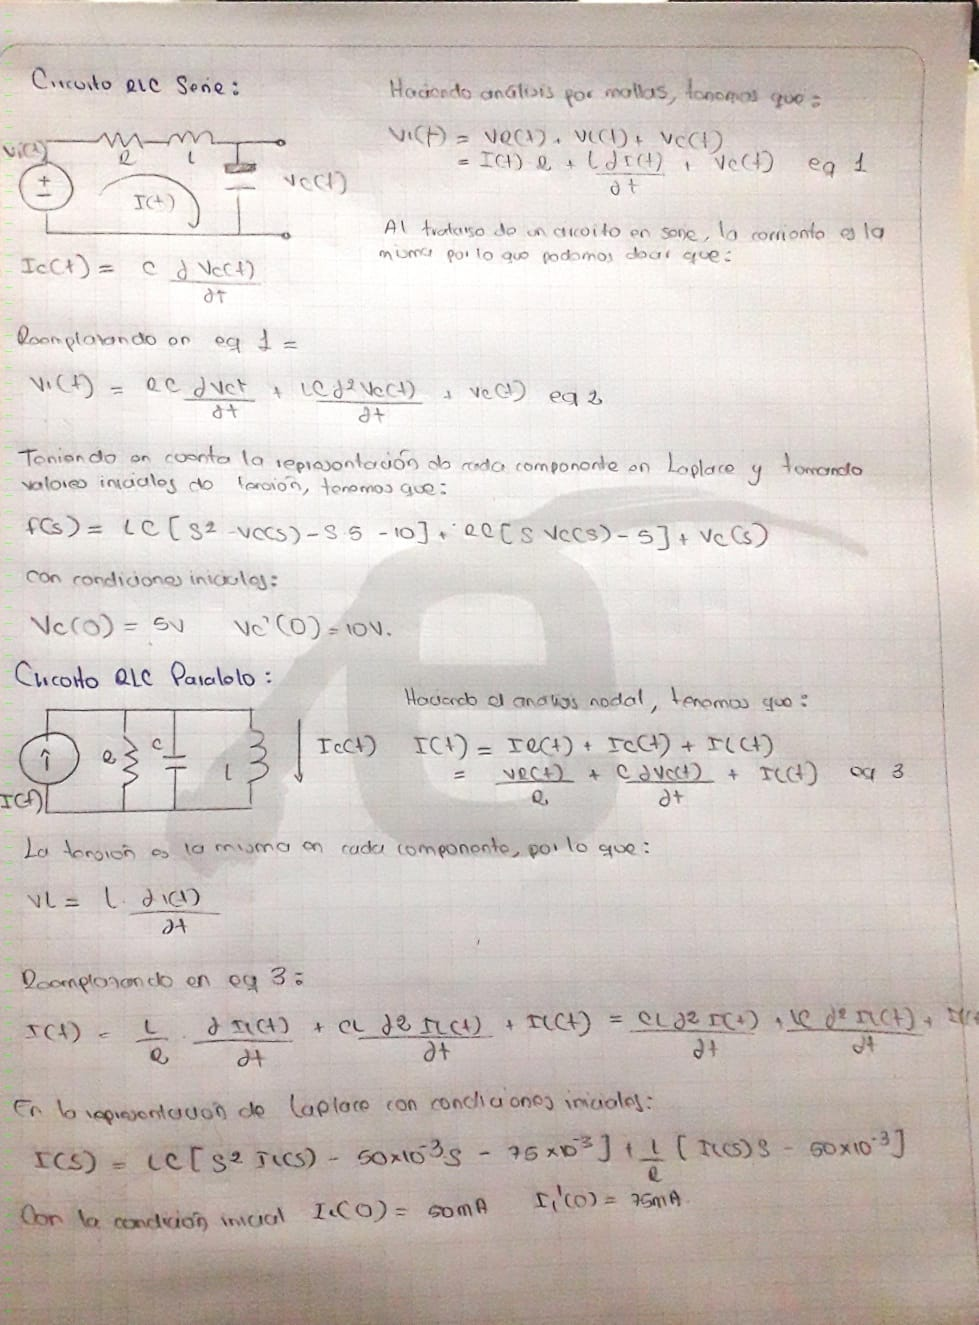

In [1]:
import sympy as sym
import matplotlib.pyplot as plt
import sympy.physics.control as control

sym.init_printing()

In [3]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)
#función de salida Y(s) = H(s)X(s
Y = 1/(L*C*s**2 + R*C*s + 1) * X #función de transferencia y entrada
Y

       X(s)       
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

In [4]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')} #valores RLC

y = sym.inverse_laplace_transform(Y.subs(RLC).subs(X, 1/s), s, t)#recuerde que puede aplicar fracciones parciales para facilitar los cálculos
y

     -t                        
    ℯ  ⋅sin(2⋅t)    -t         
1 - ──────────── - ℯ  ⋅cos(2⋅t)
         2                     

In [5]:
y = y.simplify() #simplificacion de la función con su entrada
y

⎛ t   sin(2⋅t)           ⎞  -t
⎜ℯ  - ──────── - cos(2⋅t)⎟⋅ℯ  
⎝        2               ⎠    

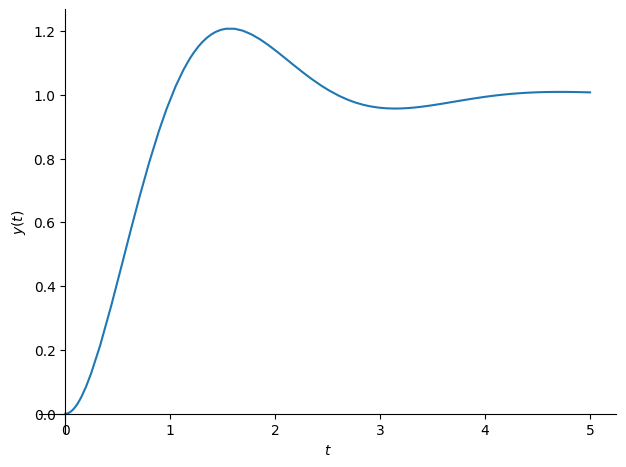

In [6]:
sym.plot(y, (t, 0, 5), xlabel='$t$', ylabel='$y(t)$'); #diagrama de la función con respecto a su tiempo


In [10]:
#teniendo en cuenta la tabla de valores de la representación en Laplace de cada componente, se hace la respuesta con valores iniciales
i0, y0 = sym.symbols('i0 y0', real=True)

Yint = (R*C + L*C*s) / (L*C*s**2 + R*C*s + 1) * y0 + L / (L*C*s**2 + R*C*s + 1) * i0
Yint

       L⋅i₀           y₀⋅(C⋅L⋅s + C⋅R) 
────────────────── + ──────────────────
     2                    2            
C⋅L⋅s  + C⋅R⋅s + 1   C⋅L⋅s  + C⋅R⋅s + 1

In [8]:
yint = sym.inverse_laplace_transform(Yint.subs(RLC).subs(i0, 0).subs(y0, -1), s, t) #transformada inversa para los valores iniciales
yint

   -t                        
  ℯ  ⋅sin(2⋅t)    -t         
- ──────────── - ℯ  ⋅cos(2⋅t)
       2                     

In [11]:
y = y + yint
y.simplify()

⎛ t                        ⎞  -t
⎝ℯ  - sin(2⋅t) - 2⋅cos(2⋅t)⎠⋅ℯ  

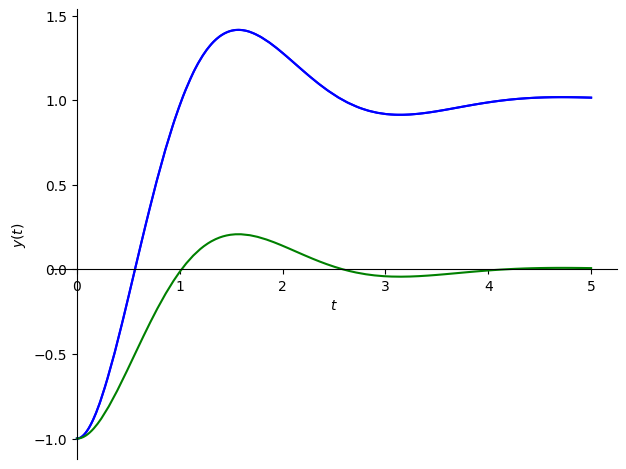

In [14]:
p1 = sym.plot(y, (t, 0, 5), line_color='b', xlabel='$t$', ylabel='$y(t)$', show=False)
p2 = sym.plot(yint, (t, 0, 5), line_color='g', show=False)
p1.extend(p1)
p1.extend(p2)
p1.show()